In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load all results
with open('results/nb_results.pkl', 'rb') as f: nb = pickle.load(f)
with open('results/dt_results.pkl', 'rb') as f: dt = pickle.load(f)
with open('results/lr_results.pkl', 'rb') as f: lr = pickle.load(f)

models = {'Naive Bayes': nb, 'Decision Tree': dt, 'Logistic Regression': lr}
datasets = ['TF-IDF', 'LSA', 'PCA']

# Combine into dataframe
rows = []
for model_name, results in models.items():
    for dataset in datasets:
        res = results[dataset]
        rows.append({
            'Model': model_name,
            'Dataset': dataset,
            'Accuracy': res['acc'],
            'Precision': res['prec'],
            'Recall': res['rec'],
            'F1': res['f1']
        })

df = pd.DataFrame(rows)
display(df)

,Model,Dataset,Accuracy,Precision,Recall,F1
0,Naive Bayes,TF-IDF,0.981982,0.982021,0.981982,0.981989
1,Naive Bayes,LSA,0.463964,0.399977,0.463964,0.299609
2,Naive Bayes,PCA,0.977477,0.978180,0.977477,0.977440
3,Decision Tree,TF-IDF,0.855856,0.863111,0.855856,0.856885
4,Decision Tree,LSA,0.948198,0.951264,0.948198,0.948613
5,Decision Tree,PCA,0.952703,0.952973,0.952703,0.952692
6,Logistic Regression,TF-IDF,0.990991,0.991048,0.990991,0.990983
7,Logistic Regression,LSA,0.986486,0.986526,0.986486,0.986470
8,Logistic Regression,PCA,0.984234,0.984705,0.984234,0.984222


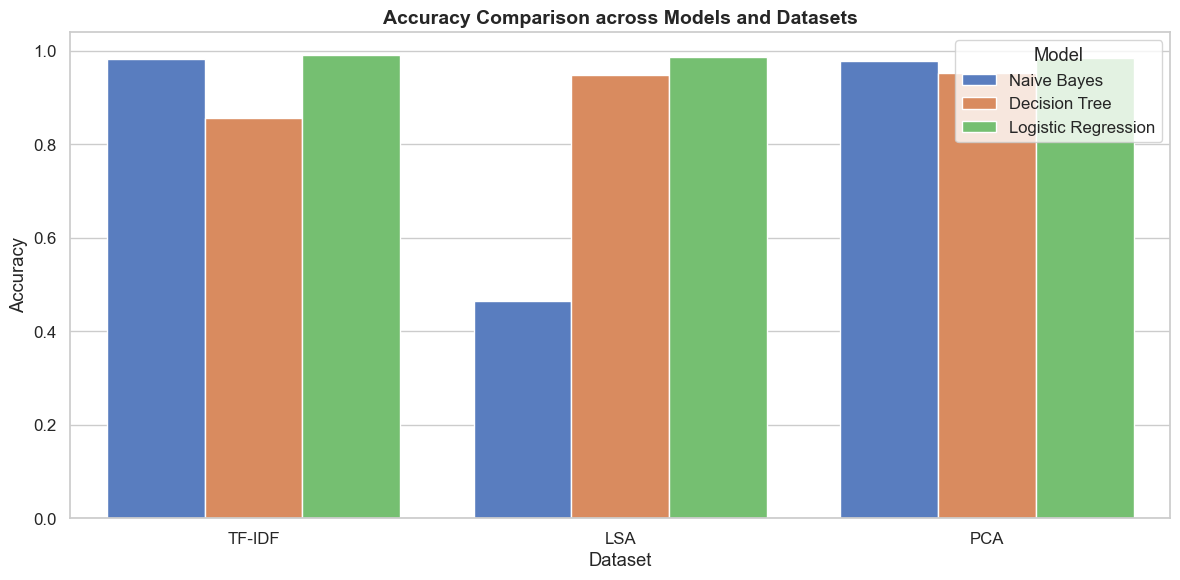

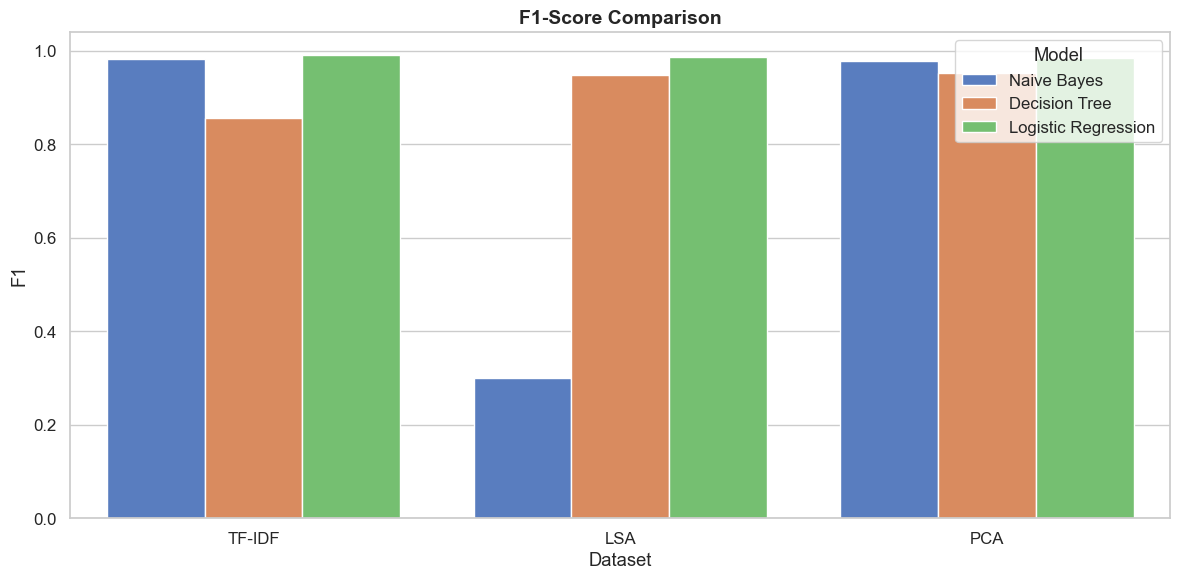

Best Model: Logistic Regression on TF-IDF — Accuracy: 99.10%


In [2]:
# --- Visualization ---
sns.set(style="whitegrid", palette="muted", font_scale=1.1)
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='Dataset', y='Accuracy', hue='Model')
plt.title("Accuracy Comparison across Models and Datasets", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))
sns.barplot(data=df, x='Dataset', y='F1', hue='Model')
plt.title("F1-Score Comparison", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Best model summary
best = df.loc[df['Accuracy'].idxmax()]
print(f"Best Model: {best['Model']} on {best['Dataset']} — Accuracy: {best['Accuracy']*100:.2f}%")

